# Graphs - Implementations and Traversals

We'll be looking into two ways of implementing graphs : the `static` approach using a matrix representation and a `dynamique` one (`hybrid` in fact) using adjacency lists. 

In [1]:
from algopy import graph, graphmat
from algopy.graphmat import GraphMat
from algopy.graph import Graph


## Exercise 1.1 : Adjacency Matrix

The `adjacency matrix` is a square matrix of size $|V|$ where $V$ is the set of vertices of the graph. At row $i$ and column $j$ one finds $1$ if the graph contains the edge/arrow $(i, j)$ and $0$ otherwise. In case of a multi-graph the coefficient found at position $(i, j)$ is the number of edge/arrow between $(i, j)$. In the case the graph is undirected then the obtained matrix is symmetrical: if edge $(i, j)$ is in the graph then so is the case of edge $(j, i)$. 

Here it the `adjacency matrix` we'll be using : 

### How are mutli-graphs represented? 

As said previously, it is enough to store the number of edges/arrows between vertices $i$ and $j$ at position $(i, j)$ of adjacency matrix. 

### How to take into account possible valuations on edges / arrows ?

In the case of a simple graph one can simply store the valuations within the adjacency matrix. In such a case be careful about the fact $0$ is not anymore a valid way of pointing out the fact there is no link between $i$ and $j$. In the case of a multi-graph there is need for another matrix of same shape to store valuations. 

### What storage complexity for this implementation ?

It is $O(|V|^2)$

### What advantages and disadvantages do we have to work with such implementation ?

These advantages or disadvantages make sense mostly in the case when they are compared to the `adjacency lists` implementation. 

#### Advantages

- It is easy to detect whether there is a link between two vertices. 

- It is practical if we're expecting to simultaneously work with all edge/arrows of a graph. That's for example the case for the Floyd-Warshall algorithm computing shortest paths between any two vertices of a graph. 

- We easily have the list of predecessors of a vertex : it is enough to look at the corresponding column. 

#### Disadvantages

- Comparing to the `adjacency lists` implementation complexity is an issue ; specifically in the case of non-dense graphs. For instance, visiting the neighbours of a given vertex has complexity $O(|V|)$ using `adjacency matrix` which is most of the time smaller in case of `adjacency lists`. 

## Exercices 1.2 : Adjacency Lists 

In this implementation the graphs is represented as a list of lists. The first list corresponds to the vertex having identifier $0$, the second for the vertex having identifier $1$ and so on. The elements of an inner list contains the list of successors of corresponding vertex. 

Here is the `python` class we'll be dealing with:

### How are multi-graphs represented? 

Given a vertex $v$ origin of many links to $s$, it is enough to repeat $s$ as many times as there are edges/arrows from $v$ to $s$. One could also store a tuple the second entry of which is the number of multi-links. 

### How to take valuations into account?

You can replace vertices by couples. 

### What is the storage complexity for this implementation ?

It is $O(|V| + |A|)$.

### What are the advantages and disadvantages of working with this implementation ?

#### Advantages

- It is easy to go through successors of a vertex ; complexity is lower than in the case of adjacency matrices. 

- It is easy to implement dynamically. 

#### Disadvantages

- Detecting the existance of an edge/arrow is not easy. 

- As is it is not easy to look for predecessors. It is standard to have such a list of lists in this implentation. 

## Exercise 1.3 : Dot

Write down the functions that give you back simplify `dot` formats for graphs using **both** previously implemented structures. 

### `Adjacency Matrix`

In [2]:
def todot_m(G):
    """Retunrs .dot file representing graph
    
    Graph is supposed to be implemented using adjacency matrix.
    
    """
    (dot, link) = ("digraph {\n", "->") if G.directed else ("graph {\n", "--")
    # Going through vertices 
    for v in range(G.order):
        # Going though links of a v
        start = 0 if G.directed else v
        for s in range(start, G.order):
            for i in range(G.adj[v][s]): # Tests for link
                dot += "{} {} {}\n".format(v, link, s)
    dot += "}"
    return dot

In [3]:
print(todot_m(graph_1))

NameError: name 'graph_1' is not defined

### `Adjacency Lists`

In [ ]:
def todot(G):
    """Retunrs .dot file representing graph
    
    Graph is supposed to be implemented using adjacency lists.
    
    """
    (dot, link) = ("digraph {\n", "->") if G.directed else ("graph {\n", "--")
    # Going through vertices 
    for v in range(G.order):
        # Going though links of a v
        for s in G.adjlists[v]:
            if G.directed or s >= v:
                dot += "{} {} {}\n".format(v, link, s)
    dot += "}"
    return dot

In [4]:
print(todot(graph_2))

NameError: name 'todot' is not defined

## Exercise 1.4 : Load

### `Adjacency Matrix`


In [5]:
bool(int("0"))

False

In [6]:
def loadGRA_m(filename):
    f = open(filename)
    directed = bool(int(f.readline())) # readline strips \n
    order = int(f.readline())
    G = GraphMat(order, directed)
    for line in f.readlines():
        edge = line.strip().split(' ')
        G.addedge(int(edge[0]), int(edge[1]))
    f.close()
    return G

In [7]:
graph_1_m = loadGRA_m("files/digraph1.gra")

In [8]:
graph_2_m = loadGRA_m("files/graph2.gra")

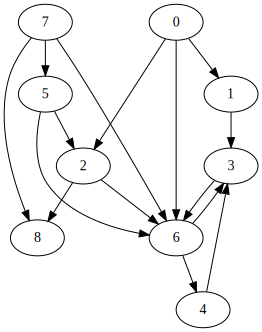

In [9]:
graphmat.display(graph_1_m)

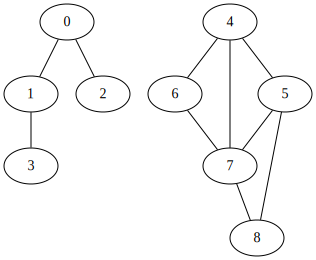

In [10]:
graphmat.display(graph_2_m)

### `Adjacency Lists`


In [11]:
def loadGRA(filename):
    f = open(filename)
    directed = bool(int(f.readline())) # readline strips \n
    order = int(f.readline())
    G = Graph(order, directed)
    for line in f.readlines():
        edge = line.strip().split(' ')
        G.addedge(int(edge[0]), int(edge[1]))
    f.close()
    return G

In [12]:
graph_1 = graph.loadgra("files/digraph1.gra")

In [13]:
graph_2 = graph.loadgra("files/graph2.gra")

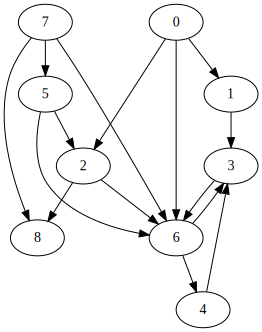

In [14]:
graph.display(graph_1)

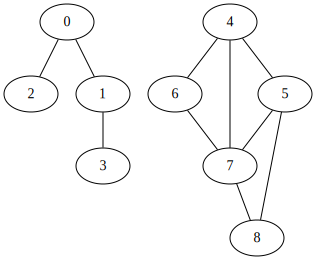

In [15]:
graph.display(graph_2)

# Traversals

**Unless explicitly stated otherwise** we'll be working under the assumption we're dealing with simple graphs (no loops nor multi-links).

## Exercise 2.1 : BFT

In [16]:
from algopy import queue
from algopy.queue import Queue

### `Adjacency Matrix`

In [17]:
def bfs_m(G):
    p = [None]*G.order
    for s in range(G.order):
        if p[s] is None:
            __bfs_m(G, s, p)
    return p

In [18]:
def __bfs_m(G, s, p):
    q = Queue()
    q.enqueue(s)
    p[s] = -1
    while not q.isempty():
        s = q.dequeue()
        print(s, end=" ")
        for v in range(G.order):
            if G.adj[s][v] and p[v] is None: 
                p[v] = s
                q.enqueue(v)

In [19]:
bfs_m(graph_2_m)

0 1 2 3 4 5 6 7 8 

[-1, 0, 0, 1, -1, 4, 4, 4, 5]

### `Adjacency Lists`

In [20]:
def bfs(G):
    p = [None]*G.order
    for s in range(G.order):
        if p[s] is None:
            __bfs(G, s, p)
    return p

In [21]:
def __bfs(G, s, p):
    q = Queue()
    q.enqueue(s)
    p[s] = -1
    while not q.isempty():
        s = q.dequeue()
        print(s, end=" ")
        for v in G.adjlists[s]:
            if p[v] is None: 
                p[v] = s
                q.enqueue(v)

In [22]:
bfs(graph_2)

0 2 1 3 4 5 6 7 8 

[-1, 0, 0, 1, -1, 4, 4, 4, 5]

## Exercise 2.2 : DFT

### `Adjacency Matrix`

In [23]:
def dfs_m(G):
    p = [None]*G.order
    for s in range(G.order):
        if p[s] is None:
            p[s] = -1
            __dfs_m(G, s, p)
    return p

def __dfs_m(G, s, p):
    for v in range(G.order):
        if G.adj[s][v]:
            if p[v] is None:
                p[v] = s
                __dfs_m(G, v, p)
            else:
                if v != p[s] and s < v:
                    print("[{} -> {}] is a backward edge".format(v, s))

In [24]:
dfs_m(graph_2_m)

[8 -> 5] is a backward edge
[6 -> 4] is a backward edge
[7 -> 4] is a backward edge


[-1, 0, 0, 1, -1, 4, 7, 5, 7]

### `Adjacency List`

In [25]:
def dfs(G):
    p = [None]*G.order
    for s in range(G.order):
        if p[s] is None:
            p[s] = -1
            __dfs(G, s, p)
    return p

def __dfs(G, s, p):
    for v in G.adjlists[s]:
        if p[v] is None:
            p[v] = s
            __dfs(G, v, p)
        else:
            if v != p[s] and s < v:
                print("[{} -> {}] is a backward edge".format(v, s))

In [26]:
dfs(graph_2)

[8 -> 5] is a backward edge
[6 -> 4] is a backward edge
[7 -> 4] is a backward edge


[-1, 0, 0, 1, -1, 4, 7, 5, 7]

## Exercise 3.1 : Path Finding

### `Breadth First Traversal`

In [27]:
def __path_bfs(G, s, v, p):
    q = Queue()
    q.enqueue(s)
    p[s] = -1
    while not q.isempty():
        w =  q.dequeue()
        for u in G.adjlists[w]: 
            if p[u] is None:
                q.enqueue(u)
                p[u] = w
                if u == v:
                    return True
    return False

def path_bfs(G, s, v):
    p = [None]*G.order
    L = []
    if __path_bfs(G, s, v, p):
        while p[v] != -1:
            L.insert(0, v)
            v = p[v]
        L.insert(0, s)
    return L
        
        

### `Depth First Traversal`

In [28]:
def __path_dfs(G, s, v, p, path):
    for i in G.adjlists[s]:
        if p[i] is None:
            p[i] = s
            if i == v or __path_dfs(G, i, v, p, path):
                path.insert(0, i)
                return True
    return False

def path_dfs(G, s, v):
    p = [None] * G.order
    path = []
    if __path_dfs(G, s, v, p, path):
        path.insert(0, s)
    return path 

## Exercice 3.4 : IsTree

In [29]:
def __isTree_dfs(G, p, v):
    for i in G.adjlists[v]:
        if p[i] is None:
            p[i] = v
            if not __isTree_dfs(G, p, i):
                return False
        elif p[v] != i:
            return False
    return True

def isTree_(G):
    p = [None] * G.order
    return __isTree_dfs(G, p, 0) and not (None in p) 

## DFS on Digraphs

In [30]:
def __dfs_dir(G, i, pre, pos, cpt):
    pre[i] = cpt
    for v in G.adjlists[i]:
        if pre[v] is None: 
            cpt = __dfs_dir(G, v, pre, pos, cpt + 1)
        else:
            if pre[i] < pre[v]: # Forward Arrow
                print("Forward arrow: {} -> {}".format(i, v))
            elif pos[v] is None: # Back Arrow 
                print("Back arrow: {} -> {}".format(i, v))
            else: # Cross Arrow
                print("Cross arrow: {} -> {}".format(i, v))
    pos[i] = cpt + 1
    return cpt + 1

def dfs_dir(G):
    cpt = 0
    pre = [None]*G.order
    pos = [None]*G.order
    for i in range(G.order):
        if pre[i] is None:
            cpt = __dfs_dir(G, i, pre, pos, cpt)
            cpt = cpt + 1

In [31]:
from random import randint

In [32]:
randint(1, 28)

25

In [33]:
dfs_dir(graph_1)

Back arrow: 6 -> 3
Back arrow: 4 -> 3
Forward arrow: 0 -> 6
Cross arrow: 2 -> 6
Cross arrow: 5 -> 2
Cross arrow: 5 -> 6
Cross arrow: 7 -> 6
Cross arrow: 7 -> 5
Cross arrow: 7 -> 8


## Exercise 3.3 : Acyclic Digraph

In [34]:
def __acyclic(G, i, pre, pos):
    pre[i] = True
    for v in G.adjlists[i]:
        if not pre[v]:
            acyclic = __acyclic(G, v, pre, pos)
            if not acyclic:
                return False
        elif not pos[v]: 
            return False
    pos[i] = True
    return True

def acyclic(G):
    pre = [False] * G.order
    pos = [False] * G.order
    for i in range(G.order):
        if not pre[i]:
            acyclic = __acyclic(G, i, pre, pos)
        if not acyclic:
            return False
    return True

In [35]:
acyclic(graph_1)

False

## Exercise 3.2: Bipartite

In [36]:
def __bipartite(G, s, M):
    for v in G.adjlists[s]:
        if M[v] is None:
            M[v] = not M[s]
            if not __bipartite(G, v, M):
                return False
        elif M[v] == M[s]:
            return False
    return True        

def bipartite(G):
    M = [None] * G.order
    for s in range (G.order):
        if M[s] is None:
            M[s] = True
            if not __bipartite(G, s, M):
                return False
    return True
            

In [37]:
bipartite(graph_2)

False

In [38]:
from random import randint

In [39]:
randint(1, 25)

20

In [40]:
def __ecc(G, p, s):
    q = Queue()
    cnt = 0
    q.enqueue(s)
    p[s] = True
    q.enqueue(None)
    while not q.isempty():
        s = q.dequeue()
        if s is None:
            cnt += 1
            if not q.isempty():
                q.enqueue(None)
        else:
            for j in G.adjlists[s]:
                if not p[j]:
                    q.enqueue(j)
                    p[j] = True
    return cnt

In [42]:
def center(G):
    radius = float('inf')
    L = []
    for x in range (G.order):
        p = [None]*G.order
        ecc = __ecc(G, p, x)
        if ecc <= radius:
            radius = ecc
            L.append(x, ecc)
    i, cen = -1, []
    if L:
        while radius == L[i][1]:
            cen.append(L[i][0])
            i -= 1
    return cen

## Exercise 3.6

In [43]:
def __top_order(G, s, M, L):
    for v in G.adjlists[s]:
        if not M[v]:
            M[v] = True
            __top_order(G, v, M, L)
    L.insert(0, s)
    
def top_order(G):
    M, L = [False] * G.order, []
    for s in range(G.order):
        if not M[s]:
            M[s] = True
            __top_order(G, s, M, L)
    return L